In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")

%matplotlib inline

In [2]:
df = pd.read_csv("../data/data_stocks.csv")

In [3]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


# Problem 1

In [4]:
df=df.T

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,41256,41257,41258,41259,41260,41261,41262,41263,41264,41265
DATE,1.491226e+09,1.491226e+09,1.491226e+09,1.491226e+09,1.491226e+09,1.491226e+09,1.491227e+09,1.491227e+09,1.491227e+09,1.491227e+09,...,1.504209e+09,1.504209e+09,1.504209e+09,1.504209e+09,1.504209e+09,1.504209e+09,1.504209e+09,1.504209e+09,1.504210e+09,1.504210e+09
SP500,2.363610e+03,2.364100e+03,2.362680e+03,2.364310e+03,2.364850e+03,2.365620e+03,2.365200e+03,2.365290e+03,2.364320e+03,2.364640e+03,...,2.471890e+03,2.472770e+03,2.472900e+03,2.472640e+03,2.472020e+03,2.472220e+03,2.471770e+03,2.470030e+03,2.471490e+03,2.471490e+03
NASDAQ.AAL,4.233000e+01,4.236000e+01,4.231000e+01,4.237000e+01,4.253780e+01,4.253990e+01,4.247000e+01,4.247000e+01,4.239000e+01,4.233000e+01,...,4.472000e+01,4.473000e+01,4.476000e+01,4.475000e+01,4.471000e+01,4.472000e+01,4.473000e+01,4.474000e+01,4.471000e+01,4.474000e+01
NASDAQ.AAPL,1.436800e+02,1.437000e+02,1.436901e+02,1.436400e+02,1.436600e+02,1.437800e+02,1.438640e+02,1.438100e+02,1.438150e+02,1.438000e+02,...,1.641600e+02,1.640600e+02,1.641900e+02,1.642000e+02,1.641400e+02,1.641100e+02,1.641200e+02,1.640100e+02,1.638800e+02,1.639800e+02
NASDAQ.ADBE,1.296300e+02,1.303200e+02,1.302250e+02,1.300729e+02,1.298800e+02,1.300700e+02,1.301800e+02,1.301400e+02,1.301000e+02,1.302100e+02,...,1.550600e+02,1.550100e+02,1.551200e+02,1.550900e+02,1.550400e+02,1.550900e+02,1.551600e+02,1.550650e+02,1.549600e+02,1.551600e+02


## Principal Component Analysis

In [6]:
X = df.iloc[1:,:]
X

,0,1,2,3,4,5,6,7,8,9,...,41256,41257,41258,41259,41260,41261,41262,41263,41264,41265
SP500,2363.6101,2364.1001,2362.6799,2364.3101,2364.8501,2365.6201,2365.200,2365.29,2364.3201,2364.6399,...,2471.8899,2472.7700,2472.8999,2472.6399,2472.020,2472.220,2471.770,2470.030,2471.4900,2471.49
NASDAQ.AAL,42.3300,42.3600,42.3100,42.3700,42.5378,42.5399,42.470,42.47,42.3900,42.3300,...,44.7200,44.7300,44.7600,44.7500,44.710,44.720,44.730,44.740,44.7100,44.74
NASDAQ.AAPL,143.6800,143.7000,143.6901,143.6400,143.6600,143.7800,143.864,143.81,143.8150,143.8000,...,164.1600,164.0600,164.1900,164.2000,164.140,164.110,164.120,164.010,163.8800,163.98
NASDAQ.ADBE,129.6300,130.3200,130.2250,130.0729,129.8800,130.0700,130.180,130.14,130.1000,130.2100,...,155.0600,155.0100,155.1200,155.0900,155.040,155.090,155.160,155.065,154.9600,155.16
NASDAQ.ADI,82.0400,82.0800,82.0300,82.0000,82.0350,82.0400,82.120,82.19,82.2300,82.1650,...,83.7100,83.7000,83.6300,83.6900,83.660,83.670,83.650,83.620,83.5800,83.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NYSE.XRX,7.3600,7.3800,7.3600,7.3500,7.3600,7.3600,7.365,7.36,7.3700,7.3650,...,32.2900,32.2950,32.3000,32.2950,32.295,32.285,32.295,32.290,32.2750,32.27
NYSE.XYL,50.2200,50.2200,50.1200,50.1600,50.2000,50.2000,50.330,50.30,50.2500,50.2200,...,62.0600,62.1000,62.1050,62.1050,62.095,62.110,62.100,62.090,62.0750,62.07
NYSE.YUM,63.8600,63.7400,63.7500,63.8800,63.9100,63.8400,63.830,63.83,63.8500,63.8400,...,76.8150,76.8100,76.8799,76.9100,76.885,76.880,76.900,76.880,76.8300,76.81
NYSE.ZBH,122.0000,121.7700,121.7000,121.7000,121.6950,121.8500,122.100,122.28,121.8750,121.9300,...,114.3600,114.3100,114.3500,114.3200,114.300,114.310,114.330,114.310,114.2300,114.28


In [7]:
y = df.iloc[0,:]
y

0        1.491226e+09
1        1.491226e+09
2        1.491226e+09
3        1.491226e+09
4        1.491226e+09
             ...     
41261    1.504209e+09
41262    1.504209e+09
41263    1.504209e+09
41264    1.504210e+09
41265    1.504210e+09
Name: DATE, Length: 41266, dtype: float64

#### Data Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

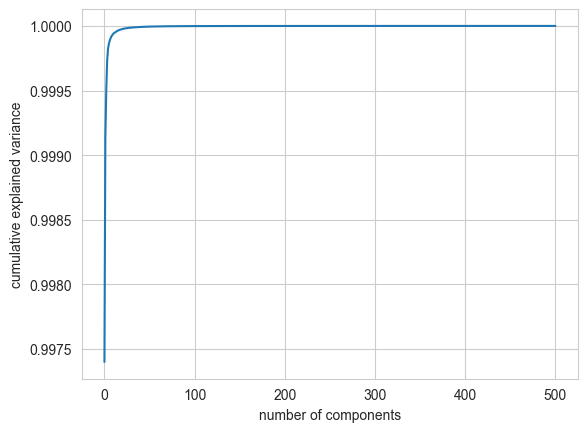

In [9]:
import seaborn as sns
from sklearn.decomposition import PCA

sns.set_style('whitegrid')
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [10]:
pca = PCA(n_components=2)
pca.fit(X_std)
print('explained variance :')
print('--------------------------------------------------------------------')
print(pca.explained_variance_)
print('--------------------------------------------------------------------')
print('PCA Components : ')
print('--------------------------------------------------------------------')
print(pca.components_)
print('--------------------------------------------------------------------')
X_transformed = pca.transform(X_std)
print('Transformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_transformed[:5,:])
print('--------------------------------------------------------------------')
print('Transformed Feature shape :')
print('--------------------------------------------------------------------')
print(X_transformed.shape)
print('--------------------------------------------------------------------')
print('Original Feature shape :')
print('--------------------------------------------------------------------')
print(X_std.shape)
print('--------------------------------------------------------------------')
print('Restransformed Feature shape :')
print('--------------------------------------------------------------------')
X_retransformed = pca.inverse_transform(X_transformed)
print(X_retransformed.shape)
print('--------------------------------------------------------------------')
print('Retransformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_retransformed[:5,:])
print('--------------------------------------------------------------------')

explained variance :
--------------------------------------------------------------------
[41241.00166464    71.66855824]
--------------------------------------------------------------------
PCA Components : 
--------------------------------------------------------------------
[[ 0.00491446  0.00491475  0.00491507 ...  0.00491842  0.00491846
   0.0049184 ]
 [ 0.00806896  0.00800282  0.00793144 ... -0.00658309 -0.00656673
  -0.00658065]]
--------------------------------------------------------------------
Transformed Feature values first five rows :
--------------------------------------------------------------------
[[ 2.85155202e+03  1.68123590e+01]
 [-6.73221228e+01 -2.14177601e+00]
 [ 5.90461410e+01 -1.58090211e+00]
 [ 4.77249784e+01 -5.52746498e+00]
 [-2.82165076e+01  7.80005490e-01]]
--------------------------------------------------------------------
Transformed Feature shape :
--------------------------------------------------------------------
(501, 2)
-------------------------

## K-Means

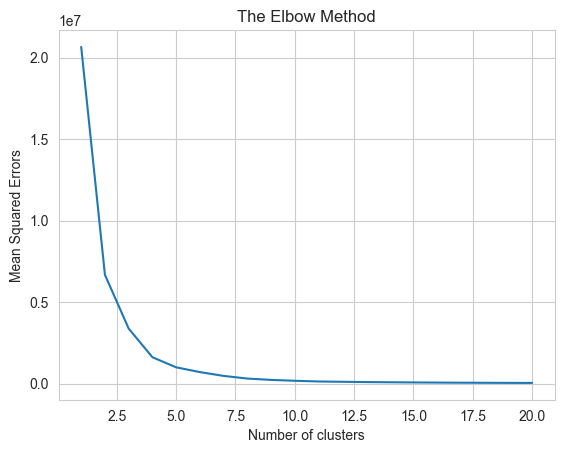

<Figure size 1000x800 with 0 Axes>

In [11]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Squared Errors')
plt.figure(figsize=(10,8))
plt.show()

<AxesSubplot:title={'center':'Elbow Plot'}, xlabel='Number of clusters', ylabel='Sum of Squared Errors'>

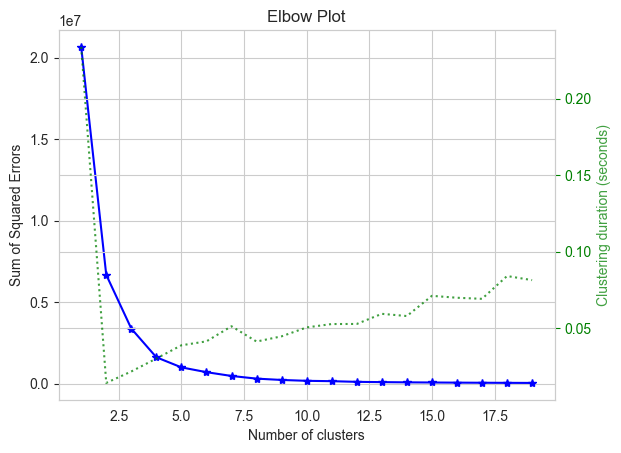

In [12]:
import scikitplot
scikitplot.cluster.plot_elbow_curve(KMeans(),X_transformed,cluster_ranges=range(1,20))

In [13]:
X_trans = pd.DataFrame(X_transformed,columns=['PCA1','PCA2']) 
X_trans

,PCA1,PCA2
0,2851.552017,16.812359
1,-67.322123,-2.141776
2,59.046141,-1.580902
3,47.724978,-5.527465
4,-28.216508,0.780005
...,...,...
496,-102.418620,-13.374199
497,-58.909653,-3.515838
498,-37.768773,-3.790280
499,23.384796,2.245973


### K-Means with 5 clusters

In [14]:
k_means = KMeans(n_clusters=5,random_state=42,init='k-means++')
X_trans['cluster number'] = k_means.fit_predict(X_trans)
X_trans['cluster number'].unique()

array([1, 0, 4, 2, 3])

In [15]:
y_kmeans = kmeans.fit_predict(X_transformed)
y_kmeans

array([ 2, 17,  8,  3,  7,  9,  9, 17, 18,  0, 11,  8, 15, 17, 14,  0,  6,
        0,  7, 18, 12, 12, 13, 12,  0, 18,  8,  0, 17, 18, 12,  7, 11, 11,
       12,  7,  9,  0,  4, 12,  0, 17,  3,  0,  8, 18, 18, 11,  0, 11, 11,
       12,  1, 15, 17,  0,  9, 11,  0, 16,  8, 16, 18, 17,  0,  3,  1,  7,
        7,  9,  0,  3,  9, 11,  7,  0, 17, 12, 11,  0, 11, 12,  8,  0,  7,
        3, 11, 11, 14, 17, 11, 12,  5,  0, 17, 17, 12,  4, 12, 17,  7,  7,
       11,  7,  0,  9, 11,  0,  7, 17,  7,  6,  0,  7,  9,  3,  7,  7,  0,
        3, 18, 12, 12,  0, 17, 18, 12,  7, 17, 18,  0, 14, 17, 12, 11,  3,
        7, 14, 12,  0,  9, 17,  9,  7,  7,  7, 12,  8,  3,  3,  0, 16,  3,
       17, 17,  3,  7, 18, 11, 16,  7,  7,  7, 16, 10, 16, 11, 17,  0, 17,
       13, 16,  0, 17, 17, 17,  4, 17, 17,  8, 11,  0, 18, 12,  0, 12,  9,
        3,  0, 12,  9, 12, 11,  0, 17, 11,  8, 12,  3, 12, 19,  8, 17,  7,
       11,  7, 11,  0,  9, 14,  0, 11, 17,  7,  0, 11,  7,  9, 18,  7, 17,
        7, 18, 12, 12,  9

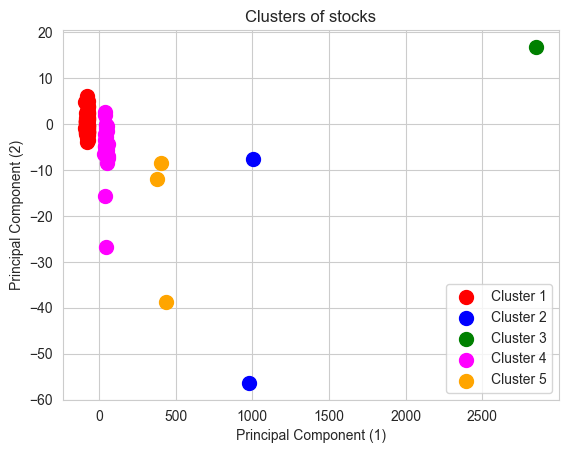

In [16]:
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()

In [20]:
X_trans

,PCA1,PCA2,cluster number
0,2851.552017,16.812359,1
1,-67.322123,-2.141776,0
2,59.046141,-1.580902,4
3,47.724978,-5.527465,4
4,-28.216508,0.780005,0
...,...,...,...
496,-102.418620,-13.374199,0
497,-58.909653,-3.515838,0
498,-37.768773,-3.790280,0
499,23.384796,2.245973,4


In [26]:
X_trans.set_index(X.index,inplace=True)

In [28]:
X_trans.index[X_trans['cluster number']==4].tolist()

['NASDAQ.AAPL',
 'NASDAQ.ADBE',
 'NASDAQ.ADP',
 'NASDAQ.ADSK',
 'NASDAQ.ALXN',
 'NASDAQ.AMGN',
 'NASDAQ.CELG',
 'NASDAQ.CME',
 'NASDAQ.COST',
 'NASDAQ.CTAS',
 'NASDAQ.EA',
 'NASDAQ.EXPE',
 'NASDAQ.FB',
 'NASDAQ.FFIV',
 'NASDAQ.FISV',
 'NASDAQ.HAS',
 'NASDAQ.HSIC',
 'NASDAQ.IDXX',
 'NASDAQ.ILMN',
 'NASDAQ.INCY',
 'NASDAQ.INTU',
 'NASDAQ.KLAC',
 'NASDAQ.LRCX',
 'NASDAQ.MAR',
 'NASDAQ.NFLX',
 'NASDAQ.NVDA',
 'NASDAQ.SWKS',
 'NASDAQ.VRTX',
 'NASDAQ.WLTW',
 'NASDAQ.WYNN',
 'NYSE.AAP',
 'NYSE.ACN',
 'NYSE.AET',
 'NYSE.AIZ',
 'NYSE.ALB',
 'NYSE.AMG',
 'NYSE.AMP',
 'NYSE.AMT',
 'NYSE.ANTM',
 'NYSE.AON',
 'NYSE.APD',
 'NYSE.ARE',
 'NYSE.AVB',
 'NYSE.AYI',
 'NYSE.BA',
 'NYSE.BDX',
 'NYSE.BRK.B',
 'NYSE.BXP',
 'NYSE.CAT',
 'NYSE.CB',
 'NYSE.CCI',
 'NYSE.CI',
 'NYSE.CLX',
 'NYSE.CMI',
 'NYSE.COL',
 'NYSE.CVX',
 'NYSE.CXO',
 'NYSE.DE',
 'NYSE.DGX',
 'NYSE.DIS',
 'NYSE.DLR',
 'NYSE.DTE',
 'NYSE.ECL',
 'NYSE.EFX',
 'NYSE.EL',
 'NYSE.EW',
 'NYSE.FDX',
 'NYSE.FRT',
 'NYSE.GD',
 'NYSE.GWW',
 'NYSE.HD',


In [29]:
X_trans.index[X_trans['cluster number']==3].tolist()

['NASDAQ.AVGO',
 'NASDAQ.BIIB',
 'NASDAQ.CHTR',
 'NASDAQ.EQIX',
 'NASDAQ.ORLY',
 'NASDAQ.REGN',
 'NASDAQ.ULTA',
 'NYSE.ADS',
 'NYSE.AGN',
 'NYSE.BCR',
 'NYSE.BLK',
 'NYSE.CMG',
 'NYSE.COO',
 'NYSE.ESS',
 'NYSE.GS',
 'NYSE.HUM',
 'NYSE.LMT',
 'NYSE.MHK',
 'NYSE.MLM',
 'NYSE.NOC',
 'NYSE.PSA',
 'NYSE.ROP',
 'NYSE.SHW',
 'NYSE.TDG']

In [31]:
X_trans.index[X_trans['cluster number']==2].tolist()

['NASDAQ.AMZN', 'NASDAQ.GOOG', 'NASDAQ.GOOGL', 'NASDAQ.ISRG', 'NYSE.AZO']

In [32]:
X_trans.index[X_trans['cluster number']==1].tolist()

['SP500', 'NASDAQ.PCLN']

In [33]:
X_trans.index[X_trans['cluster number']==0].tolist()

['NASDAQ.AAL',
 'NASDAQ.ADI',
 'NASDAQ.AKAM',
 'NASDAQ.AMAT',
 'NASDAQ.AMD',
 'NASDAQ.ATVI',
 'NASDAQ.BBBY',
 'NASDAQ.CA',
 'NASDAQ.CBOE',
 'NASDAQ.CERN',
 'NASDAQ.CHRW',
 'NASDAQ.CINF',
 'NASDAQ.CMCSA',
 'NASDAQ.CSCO',
 'NASDAQ.CSX',
 'NASDAQ.CTSH',
 'NASDAQ.CTXS',
 'NASDAQ.DISCA',
 'NASDAQ.DISCK',
 'NASDAQ.DISH',
 'NASDAQ.DLTR',
 'NASDAQ.EBAY',
 'NASDAQ.ESRX',
 'NASDAQ.ETFC',
 'NASDAQ.EXPD',
 'NASDAQ.FAST',
 'NASDAQ.FITB',
 'NASDAQ.FLIR',
 'NASDAQ.FOX',
 'NASDAQ.FOXA',
 'NASDAQ.GILD',
 'NASDAQ.GRMN',
 'NASDAQ.GT',
 'NASDAQ.HBAN',
 'NASDAQ.HOLX',
 'NASDAQ.INFO',
 'NASDAQ.INTC',
 'NASDAQ.JBHT',
 'NASDAQ.KHC',
 'NASDAQ.LKQ',
 'NASDAQ.MAT',
 'NASDAQ.MCHP',
 'NASDAQ.MDLZ',
 'NASDAQ.MNST',
 'NASDAQ.MSFT',
 'NASDAQ.MU',
 'NASDAQ.MYL',
 'NASDAQ.NAVI',
 'NASDAQ.NDAQ',
 'NASDAQ.NTAP',
 'NASDAQ.NTRS',
 'NASDAQ.NWS',
 'NASDAQ.NWSA',
 'NASDAQ.PAYX',
 'NASDAQ.PBCT',
 'NASDAQ.PCAR',
 'NASDAQ.PDCO',
 'NASDAQ.PYPL',
 'NASDAQ.QCOM',
 'NASDAQ.QRVO',
 'NASDAQ.ROST',
 'NASDAQ.SBUX',
 'NASDAQ.SNI',
 'NASD

# Problem 2